In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob

In [2]:
amz_reviews = pd.read_csv("1429_1.csv")


/home/uracilo/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (1,10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:

amz_reviews.shape


(34660, 21)

In [5]:


amz_reviews.columns


Index(['id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer',
       'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.userCity',
       'reviews.userProvince', 'reviews.username'],
      dtype='object')

In [6]:
columns = ['id','name','keys','manufacturer','reviews.dateAdded', 'reviews.date','reviews.didPurchase',
          'reviews.userCity', 'reviews.userProvince', 'reviews.dateSeen', 'reviews.doRecommend','asins',
          'reviews.id', 'reviews.numHelpful', 'reviews.sourceURLs', 'reviews.title']
 
df = pd.DataFrame(amz_reviews.drop(columns,axis=1,inplace=False))


<AxesSubplot:>

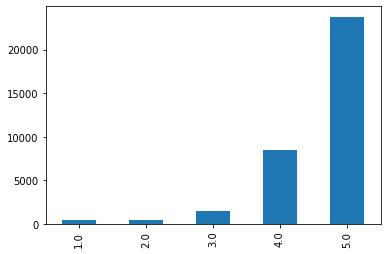

In [7]:
df['reviews.rating'].value_counts().plot(kind='bar')


##  Lowercasing
Before we move forward to calculate the sentiment scores for each review it is important to pre-process the textual data. Lowercasing helps in the process of normalization which is an important step to keep the words in a uniform manner (Welbers, et al., 2017, pp. 245-265).



In [9]:
## Change the reviews type to string
df['reviews.text'] = df['reviews.text'].astype(str)
 

In [10]:
## Before lowercasing 
df['reviews.text'][2]

'Inexpensive tablet for him to use and learn on, step up from the NABI. He was thrilled with it, learn how to Skype on it already...'

In [11]:
df['reviews.text'] = df['reviews.text'].apply(lambda x: " ".join(x.lower() for x in x.split()))


In [13]:
df['reviews.text'][2] ## to see the difference


'inexpensive tablet for him to use and learn on, step up from the nabi. he was thrilled with it, learn how to skype on it already...'

###  Special characters
Special characters are non-alphabetic and non-numeric values such as {!,@#$%^ *()~;:/<>\|+_-[]?}. Dealing with numbers is straightforward but special characters can be sometimes tricky. During tokenization, special characters create their own tokens and again not helpful for any algorithm, likewise, numbers.



In [14]:
df['reviews.text'] = df['reviews.text'].str.replace('[^\w\s]','')


<ipython-input-14-f165ca793405>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['reviews.text'] = df['reviews.text'].str.replace('[^\w\s]','')


In [15]:
df['reviews.text'][2]


'inexpensive tablet for him to use and learn on step up from the nabi he was thrilled with it learn how to skype on it already'

##  Stopwords
Stop-words being most commonly used in the English language; however, these words have no predictive power in reality. Words such as I, me, myself, he, she, they, our, mine, you, yours etc.



In [20]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/uracilo/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [21]:
stop = stopwords.words('english')

In [22]:
df['reviews.text'] = df['reviews.text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))


In [23]:
df['reviews.text'][2]

'inexpensive tablet use learn step nabi thrilled learn skype already'

###  Stemming
Stemming algorithm is very useful in the field of text mining and helps to gain relevant information as it reduces all words with the same roots to a common form by removing suffixes such as -action, ing, -es and -ses. However, there can be problematic where there are spelling errors.



In [24]:
st = PorterStemmer()


In [25]:
df['reviews.text'] = df['reviews.text'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))


In [26]:
df['reviews.text'][2]

'inexpens tablet use learn step nabi thrill learn skype alreadi'

In [32]:

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

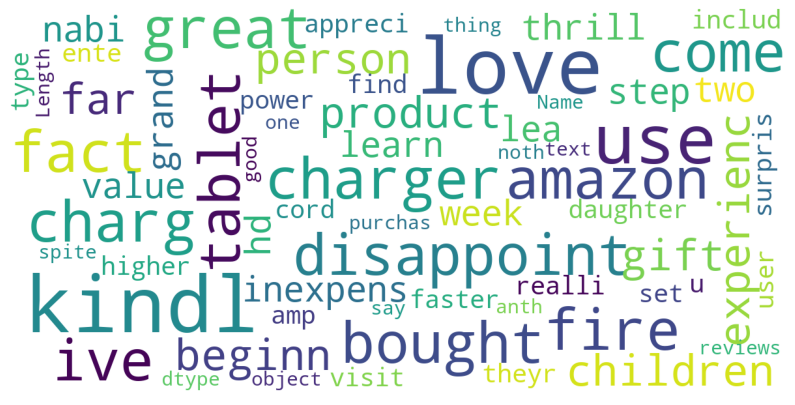

In [33]:
def show_wordcloud(col, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=500,
        max_font_size=40, 
        scale=3,
        random_state=1
    ).generate(str(col))

    fig = plt.figure(1, figsize=(14, 14))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()


if __name__ == '__main__':

    show_wordcloud(df['reviews.text']) 

In [28]:
def senti(x):
    return TextBlob(x).sentiment  
 
df['senti_score'] = df['reviews.text'].apply(senti)
 


In [29]:
df.senti_score.head()

0                                   (0.3, 0.8)
1                                (0.65, 0.675)
2                                   (0.0, 0.0)
3    (0.29545454545454547, 0.6492424242424243)
4                    (0.5, 0.5827777777777777)
Name: senti_score, dtype: object

In [30]:
df

,brand,categories,reviews.rating,reviews.text,reviews.username,senti_score
0,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",5.0,product far disappoint children love use like ...,Adapter,"(0.3, 0.8)"
1,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",5.0,great beginn experienc person bought gift love,truman,"(0.65, 0.675)"
2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",5.0,inexpens tablet use learn step nabi thrill lea...,DaveZ,"(0.0, 0.0)"
3,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",4.0,ive fire hd 8 two week love tablet great value...,Shacks,"(0.29545454545454547, 0.6492424242424243)"
4,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",5.0,bought grand daughter come visit set user ente...,explore42,"(0.5, 0.5827777777777777)"
...,...,...,...,...,...,...
34655,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",3.0,appreci faster 18 higher amp charger use kindl...,Kris,"(0.27499999999999997, 0.3461538461538462)"
34656,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",1.0,amazon includ charger kindl fact theyr charg u...,Jonathan Stewart,"(0.2, 0.39999999999999997)"
34657,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",1.0,love kindl fire realli disappoint kindl power ...,J Lawson,"(0.3111111111111111, 0.4222222222222222)"
34658,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",1.0,surpris find come type charg cord purchas one ...,Just the Buyer,"(0.0, 0.0)"
